In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
data['LoanAmount']=data['LoanAmount'].fillna(np.mean(data['LoanAmount']))

In [12]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(np.mean(data['Loan_Amount_Term']))

In [13]:
data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [16]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [17]:
data.drop(columns=['Loan_ID'],axis=1,inplace=True)

In [18]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['Gender']=encoder.fit_transform(data['Gender'])
data['Married']=encoder.fit_transform(data['Married'])
data['Education']=encoder.fit_transform(data['Education'])
data['Self_Employed']=encoder.fit_transform(data['Self_Employed'])
data['Property_Area']=encoder.fit_transform(data['Property_Area'])
data['Dependents']=encoder.fit_transform(data['Dependents'])

In [20]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
5,1,1,0,1,1,2165,3422,152.0,360.0,1.0,2


<Axes: >

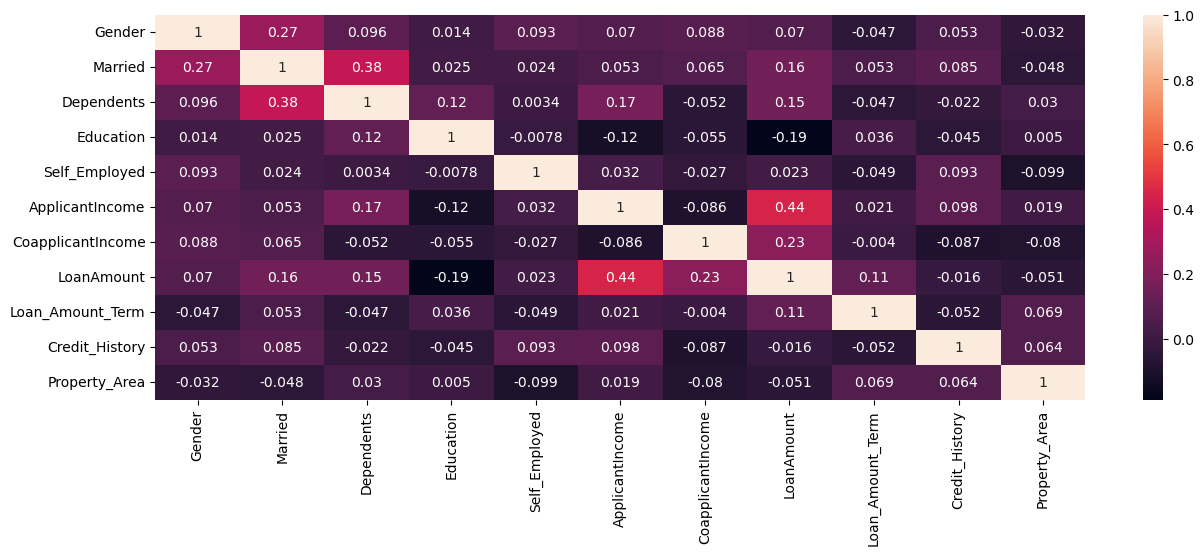

In [25]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)

In [26]:
data.drop(columns=['Gender','Self_Employed','Credit_History','Property_Area'],axis=1,inplace=True)

In [27]:
data.head()

,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,1,0,0,5720,0,110.0,360.0
1,1,1,0,3076,1500,126.0,360.0
2,1,2,0,5000,1800,208.0,360.0
4,0,0,1,3276,0,78.0,360.0
5,1,0,1,2165,3422,152.0,360.0


In [29]:
X=data.drop(['LoanAmount'],axis=1)

In [30]:
y=data[['LoanAmount']]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("mse",mean_squared_error(y_test,y_pred))
print("mae",mean_absolute_error(y_test,y_pred))
print("r2",r2_score(y_test,y_pred))


mse 2710.5591975800726
mae 35.86474920133766
r2 0.22191446213898847
